<a href="https://colab.research.google.com/github/MuhammadRaynaldi/Python-Project/blob/main/Weibull_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special as sc

In [13]:
WS = pd.read_csv("Wind_Speed.csv", sep=";") #separation usng (sep=";")
WS = WS.iloc[:, 4:5] #ca use another trick WS.iloc[:, -1]
WS

,WS50M
0,13.65
1,13.84
2,12.83
3,12.38
4,11.95
...,...
10027,12.19
10028,11.92
10029,11.46
10030,11.28


In [26]:
def weibul(x,c,k):
    return (k/c)*(x/c)**(k-1)*np.exp(-(x/c)**k)
k = (math.sqrt(np.mean(abs(WS-np.mean(WS))**2))/np.mean(WS))**-1.089
#remember standart deviation equation for population

Gamma_F = math.exp(sc.gammaln(1+(1/k)))
c = (np.mean(WS)/Gamma_F)

Weibull = weibul(WS,c,k)
Weibull_DF = pd.DataFrame(Weibull).rename(columns ={'WS50M':'Probability'})
Weibull_DF


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

,Probability
0,0.023416
1,0.021588
2,0.032504
3,0.038304
4,0.044344
...,...
10027,0.040916
10028,0.044782
10029,0.051743
10030,0.054578


**Visualization**

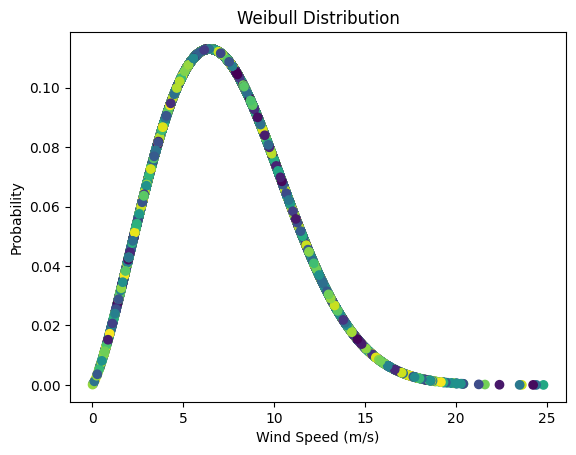

In [42]:
N = 10032
colors = np.random.rand(N) #using N colours

plt.scatter(WS,Weibull_DF,c = colors, zorder = 2)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability')
plt.title('Weibull Distribution')
plt.show()